############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --###########################
############################################################################################

Modelos de Regresión Avanzados : Regresión Múltiple, Regresiones Penalizadas

Autores : José Cárdenas - André Chávez 

In [ ]:
##################################################
##### Modelo de Regresión Lineal Simple ##########
##################################################

In [2]:
import pandas as pd
vivienda=pd.read_excel('C:/Users/Andre Chavez/Desktop/Datos/PrecioVivienda.xlsx')

In [3]:
vivienda.shape

(128, 2)

In [4]:
# Antes de poder realizar el modelo de regresión lineal debemos ver si existe asociación y de qué tipo es.
# coeficiente de correlación
vivienda.corr()

,Precio,Piescuad
Precio,1.000000,0.552982
Piescuad,0.552982,1.000000


In [5]:
import seaborn as sns 
par= sns.pairplot(vivienda)

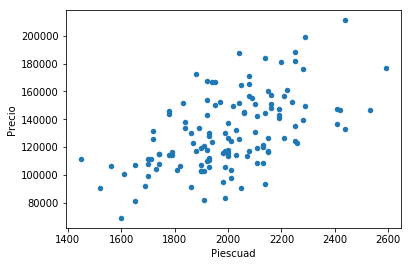

In [94]:
# diagrama de dispersión
disp= vivienda.plot(kind='scatter', x='Piescuad', y='Precio')

In [ ]:
# Separamos la VD y la VI

In [98]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=vivienda.drop('Precio',axis=1)
y=vivienda.Precio

In [99]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [100]:
# Entrenamiento
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


-10091.129909123119

In [102]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.coef_

El coeficiente asociado a la ordenada en el origen es :


array([ 70.22631824])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

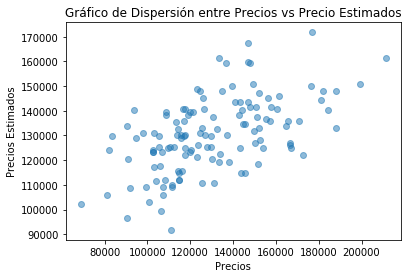

In [108]:
plt.scatter(vivienda.Precio,lm.predict(X), alpha=0.5)
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [109]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lm.predict(X))

497256650.32998586

In [123]:
# Prediciendo
lm.predict(X)[0:5]

array([ 115613.97974564,  132468.29612393,  112102.6638335 ,
        128956.98021179,  139490.92794822])

In [ ]:
##################################################
##### Modelo de Regresión Lineal Múltiple ########
##################################################

In [128]:
# Cargamos las librerías a utilizar
% matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import sklearn

In [129]:
from sklearn.datasets import load_boston # Existen datasets que podemos utilizar en el desarrollo de los temas. UCI

In [130]:
# Cargamos la data con la información
boston=load_boston()

In [131]:
# Observamos los elementos que extraemos en la data
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [132]:
boston.data.shape

(506, 13)

In [133]:
7print(boston.feature_names)

SyntaxError: invalid syntax (<ipython-input-133-b45e945bc9e9>, line 1)

In [9]:
# Descripción del dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [134]:
# Podemos obervar los datos que provienen en la información
bos = pd.DataFrame(boston.data)

In [135]:
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [136]:
bos.columns = boston.feature_names

In [137]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [138]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [139]:
# Le asignamos el nombre a la variable target o más importante
bos["PRICE"]=boston.target

In [140]:
bos.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [141]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=bos.drop("PRICE",axis=1)

In [142]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [143]:
# Entrenamiento
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


36.491103280363404

In [145]:
# Hallamos el coeficiente
print("El núnero de coeficientes es :")
len(lm.coef_)

El núnero de coeficientes es :


13

In [146]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lm.coef_,X.columns)
coef

,0
CRIM,-0.107171
ZN,0.046395
INDUS,0.020860
CHAS,2.688561
NOX,-17.795759
RM,3.804752
AGE,0.000751
DIS,-1.475759
RAD,0.305655
TAX,-0.012329


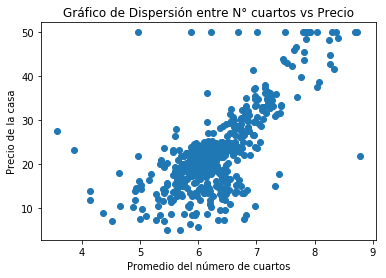

In [147]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Promedio del número de cuartos")
plt.ylabel("Precio de la casa")
plt.title("Gráfico de Dispersión entre N° cuartos vs Precio")
plt.show()

In [148]:
# Con predict podemos predecir cualquier valor deseado.
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

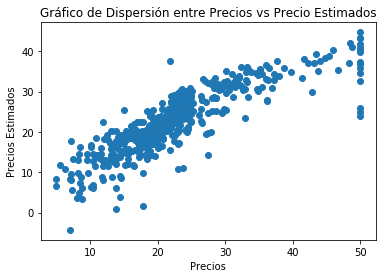

In [149]:
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [150]:
# Calculamos el error cuadrático medio u algún indicador para validar que tan bien fue nuestra predicción.
mse_Total = np.mean((bos.PRICE-lm.predict(X))**2)
mse_Total

21.897779217687486

In [151]:
# Podemos correr otro modelo de regresión y comparar los resultados
lm=LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
mse_Parcial=np.mean((bos.PRICE-lm.predict(X[['PTRATIO']]))**2)
mse_Parcial

62.65220001376927

######--- Metodología de Modelamiento ---#######

In [153]:
# Dividimos el conjunto de datos en train, test, validacion 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,bos.PRICE,test_size=0.30,random_state=5)

In [154]:
# Podemos revisar la cantidad de elementos por dataset
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape

(152,)

In [155]:
# Ajustamos el modelo de regresión lineal
lm=LinearRegression()
lm.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

In [157]:
print("Fit a model X_train, and calculate MSE with Y_train:",
      np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", 
      np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.071527965850688
Fit a model X_train, and calculate MSE with X_test, Y_test: 30.703232207219212


In [ ]:
##################################################
##### Modelo de Regresión Penalizadas ############
##################################################

In [ ]:
##### Modelo de Regresión Penalizadas : Ridge ############

In [161]:
# Cargamos las librerías necesarias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [183]:
# Creamos un vector con los valores de alpha o constante de penalización
alphas = 10**np.linspace(10,-1,100)*0.5
alphas.shape

(100,)

In [184]:
# Generamos las covariables y la VD.
X=bos.drop("PRICE",axis=1)
y=bos.PRICE

In [185]:
# Generamos el ajuste de las regresiones para cada valor de alpha
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 13)

Text(0,0.5,'weights')

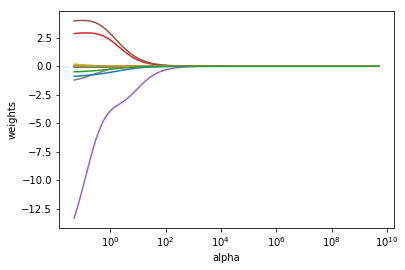

In [186]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [187]:
# Dividimos o partimos la data en train y test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [195]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 0.001, normalize = True)
ridge2.fit(X_train, y_train)             # Ajustamos el modelo ridge
pred2 = ridge2.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge2.coef_, index = X.columns)) # Pintamos los coeficientes
print(mean_squared_error(y_test, pred2))          # Calculamos el MSE

CRIM       -0.101083
ZN          0.064821
INDUS      -0.011939
CHAS        1.464540
NOX       -17.163805
RM          3.311629
AGE         0.010919
DIS        -1.365320
RAD         0.317091
TAX        -0.011688
PTRATIO    -0.822273
B           0.008887
LSTAT      -0.529350
dtype: float64
22.8294258484


In [196]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Ajuste del modelo ridge
pred3 = ridge3.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))     

CRIM      -3.985436e-11
ZN         1.474970e-11
INDUS     -7.183047e-11
CHAS       2.647661e-10
NOX       -3.497055e-09
RM         9.037372e-10
AGE       -1.349357e-11
DIS        1.391119e-10
RAD       -3.785895e-11
TAX       -2.437473e-12
PTRATIO   -2.043905e-10
B          3.302125e-12
LSTAT     -9.060743e-11
dtype: float64
88.6981920854


In [199]:
# ¿Qué pasa si alpha o el coeficiente de penalización es 0?
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)    
pred = ridge2.predict(X_test)            
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))           

CRIM       -0.101649
ZN          0.065586
INDUS      -0.009083
CHAS        1.456272
NOX       -17.277956
RM          3.303619
AGE         0.011048
DIS        -1.374456
RAD         0.322356
TAX        -0.011993
PTRATIO    -0.822050
B           0.008887
LSTAT      -0.530429
dtype: float64
22.8267065844


In [200]:
# Podemos hallar el mejor valor de alpha por Cv
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.050000000000000003

In [201]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

23.49802962034379

In [202]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

CRIM       -0.091150
ZN          0.035522
INDUS      -0.027597
CHAS        2.870890
NOX       -13.330640
RM          3.982071
AGE        -0.002874
DIS        -1.212024
RAD         0.182669
TAX        -0.006841
PTRATIO    -0.880501
B           0.009232
LSTAT      -0.487090
dtype: float64

In [ ]:
##### Modelo de Regresión Penalizadas : Lasso ############

Text(0,0.5,'weights')

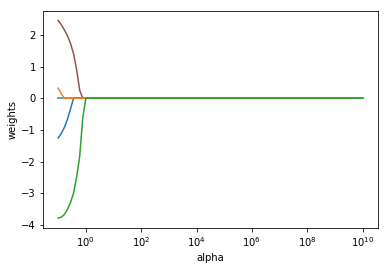

In [203]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [204]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

22.843590646678322

In [205]:
# Podemos observar que algunos coeficientes se hacen casi 0
pd.Series(lasso.coef_, index=X.columns)

CRIM       -0.096428
ZN          0.060985
INDUS      -0.017452
CHAS        1.454806
NOX       -16.554529
RM          3.352740
AGE         0.008980
DIS        -1.323591
RAD         0.291928
TAX        -0.010431
PTRATIO    -0.820432
B           0.008796
LSTAT      -0.526971
dtype: float64